In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


df=pd.read_csv(r"C:\Users\jazoi\Downloads\MLF_GP1_CreditScore.csv")
df.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,A1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,A1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,...,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,A1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,...,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,A1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,...,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,A1


In [3]:
print("Number of rows: ", len(df.index))
print("Number of columns: ",len(df.columns))

Number of rows:  1700
Number of columns:  28


In [4]:
df.dtypes

Sales/Revenues              float64
Gross Margin                float64
EBITDA                      float64
EBITDA Margin               float64
Net Income Before Extras    float64
Total Debt                  float64
Net Debt                    float64
LT Debt                     float64
ST Debt                     float64
Cash                        float64
Free Cash Flow              float64
Total Debt/EBITDA           float64
Net Debt/EBITDA             float64
Total MV                    float64
Total Debt/MV               float64
Net Debt/MV                 float64
CFO/Debt                    float64
CFO                         float64
Interest Coverage           float64
Total Liquidity             float64
Current Liquidity           float64
Current Liabilities         float64
EPS Before Extras           float64
PE                          float64
ROA                         float64
ROE                         float64
InvGrd                        int64
Rating                      

In [5]:
df.shape

(1700, 28)

In [6]:
print("Count for each rating: ")
df['Rating'].value_counts()

Count for each rating: 


Baa2    326
Baa3    232
Baa1    179
Aa3     174
A2      156
Ba2     125
A1      122
Ba3     108
B1       69
Aa2      65
B2       48
B3       37
A3       31
Ba1      17
Caa1      9
Aaa       2
Name: Rating, dtype: int64

In [7]:
print("Count for investment grade bonds: ")
df['InvGrd'].value_counts()

Count for investment grade bonds: 


1    1287
0     413
Name: InvGrd, dtype: int64

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,Free Cash Flow,Total Debt/EBITDA,Net Debt/EBITDA,Total MV,Total Debt/MV,Net Debt/MV,CFO/Debt,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd
Sales/Revenues,1,-0.0263181,0.500178,-0.124079,0.0120237,0.0689376,0.175741,0.0489603,0.0149874,-0.00808846,0.0357156,0.0560921,0.110201,0.123111,0.0621285,0.176797,0.0168331,0.0340692,0.0327159,0.0357467,-0.0813455,0.553807,0.0347217,-0.0148425,0.00725076,-0.000205951,-0.0808364
Gross Margin,-0.0263181,1,0.114092,0.147886,-0.00106061,-0.00266534,0.00426626,-0.00314908,-0.00541671,-0.02454,0.00191952,-0.00568954,-0.000235625,0.0243607,-0.0039544,0.00994542,-0.055521,-0.0555688,-0.00207905,-0.0111902,-0.022793,0.051386,0.000857416,0.0291457,-0.00158315,0.000181603,-0.0661031
EBITDA,0.500178,0.114092,1,0.757142,0.0125648,0.00894894,0.119251,-0.000664732,0.00484382,-0.0307727,0.00910238,-0.00952694,0.0742839,0.256941,0.00285708,0.123084,-0.0545408,-0.0410638,0.0281176,-0.00879925,-0.0546803,0.207526,0.0421914,0.0407324,0.00791289,-0.00570075,-0.0859511
EBITDA Margin,-0.124079,0.147886,0.757142,1,0.00333131,-0.0398044,0.000336317,-0.0370086,-0.00631025,-0.0239973,-0.0213009,-0.0510616,-0.000145049,0.209314,-0.0417279,0.0042255,-0.0765536,-0.0753261,0.00814657,-0.0338622,-3.56939e-05,-0.119068,0.0215895,0.071426,0.00207211,-0.00832798,-0.0241115
Net Income Before Extras,0.0120237,-0.00106061,0.0125648,0.00333131,1,-0.001065,0.000867388,-0.0011615,-0.000220516,-0.00670318,0.023523,-0.00149003,0.000312123,-0.00551077,-0.00125212,0.000701082,0.00208419,0.00183201,0.00223266,-0.00193813,-0.00813127,0.00422557,0.506547,-0.00316632,0.997349,0.782491,-0.027919
Total Debt,0.0689376,-0.00266534,0.00894894,-0.0398044,-0.001065,1,-0.0222095,0.833567,0.11824,-0.0300017,0.00253875,0.999328,-0.0351365,-0.0564495,0.964306,-0.0223048,-0.00850824,0.000924394,-0.0160784,-0.000800865,-0.0315997,0.0623643,-0.00142444,-0.00365176,-0.00140611,0.000300858,-0.0903721
Net Debt,0.175741,0.00426626,0.119251,0.000336317,0.000867388,-0.0222095,1,-0.0213066,0.00119147,0.00718359,-0.013257,-0.031475,0.907461,0.000172782,-0.0192872,0.978717,0.00157946,0.00276158,-0.00356573,0.000492158,-0.0038239,0.0591392,0.00104592,-0.00037112,-0.000708867,-0.00196479,-0.0421947
LT Debt,0.0489603,-0.00314908,-0.000664732,-0.0370086,-0.0011615,0.833567,-0.0213066,1,0.0923928,-0.0300836,0.00239889,0.833357,-0.0328281,-0.0428304,0.805303,-0.0196847,-0.00624093,0.00126996,-0.0148102,-0.000532191,-0.0265733,0.023553,-0.00129811,-0.00354473,-0.00130345,0.00071183,-0.061665
ST Debt,0.0149874,-0.00541671,0.00484382,-0.00631025,-0.000220516,0.11824,0.00119147,0.0923928,1,-0.0128025,0.00444778,0.120847,7.82072e-05,-0.00701865,0.0894128,-0.00431074,-0.00269457,0.00272878,-0.00723318,0.000502784,-0.0232349,0.105872,0.000274645,-0.00270421,-0.000339184,-0.00102238,-0.0030283
Cash,-0.00808846,-0.02454,-0.0307727,-0.0239973,-0.00670318,-0.0300017,0.00718359,-0.0300836,-0.0128025,1,0.00260281,-0.0292707,0.0163371,0.115015,-0.0285434,0.00723177,0.0208861,0.0197515,-0.0239205,0.0239926,0.973123,0.0047121,-0.0174695,0.0341556,-0.00660575,-0.000344018,-0.0888769


In [9]:
X_rating,y_rating = df.iloc[:,0:25].values, df.iloc[:, 26].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_rating, y_rating,test_size=0.25, random_state=11)

In [11]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

[3.71949888e-01 3.65929149e-01 1.07556891e-01 4.79723842e-02
 4.30070321e-02 1.69467936e-02 1.03524304e-02 9.69246721e-03
 9.63576886e-03 6.92999451e-03 3.28614186e-03 3.06948860e-03
 1.67052579e-03 1.32134163e-03 5.29740257e-04 6.48642959e-05
 2.85597057e-05 1.96020113e-05 1.21926853e-05 9.15273530e-06
 6.84110404e-06 4.10889764e-06 3.00089025e-06 1.49423521e-06
 1.46214799e-07]


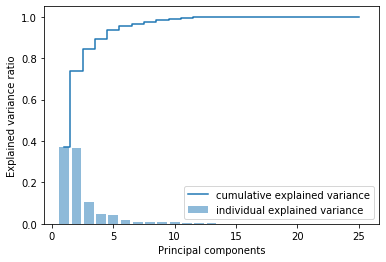

In [12]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)
plt.bar(range(1,26), pca.explained_variance_ratio_, alpha=0.5, align='center',label='individual explained variance')
cum_var = np.cumsum(pca.explained_variance_ratio_)
plt.step(range(1,26), cum_var, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [13]:
cov_mat = np.cov(X_train_std.T)
eigen_vals,eigen_vecs = np.linalg.eig(cov_mat)
print("Eigen Values: \n",eigen_vals)

Eigen Values: 
 [3.76577449e+00 2.97314294e+00 2.25598524e+00 2.15600948e+00
 2.01164259e+00 1.92817056e+00 1.52688535e+00 7.62103884e-01
 8.09442618e-01 1.04397861e+00 9.62183758e-01 9.64719078e-01
 9.93793971e-01 9.86216533e-01 9.82982801e-01 4.02031370e-01
 2.37611868e-01 1.31314150e-01 5.36876466e-02 3.53344837e-02
 1.72738043e-02 1.05977778e-02 5.40929454e-03 2.85877719e-04
 3.04505795e-03]


<function matplotlib.pyplot.show(*args, **kw)>

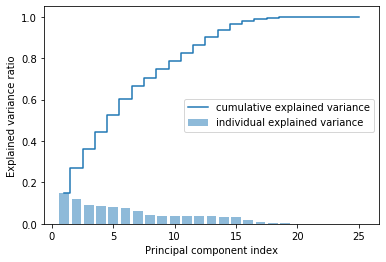

In [14]:
tot = sum(eigen_vals)
var_exp = [(i/tot)for i in sorted(eigen_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,26), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,26),cum_var_exp, where = 'mid',label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

clf = DecisionTreeClassifier()
clf = clf.fit(X_train_pca,y_train)
y_pred = clf.predict(X_test_std)

print("Decision Tree:")
print("----------------------")

R2_Train_Score_All_DTC = clf.score(X_train_pca, y_train)
print("Train Score: %.3f" % R2_Train_Score_All_DTC)

R2_Test_Score_All_DTC = clf.score(X_test_std, y_test)
print("Test Score: %.3f" % R2_Test_Score_All_DTC)

Decision Tree:
----------------------
Train Score: 1.000
Test Score: 0.591


In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train_pca,y_train)
y_pred = lr.predict(X_test_std)

print("Logistic Regression:")
print("----------------------")

R2_Train_Score_All_LR = lr.score(X_train_pca, y_train)
print("Train Score: %.3f" % R2_Train_Score_All_LR)

R2_Test_Score_All_LR = lr.score(X_test_std, y_test)
print("Test Score: %.3f" % R2_Test_Score_All_LR)

Logistic Regression:
----------------------
Train Score: 0.782
Test Score: 0.741


C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
from sklearn import svm

SVM = svm.SVC()
SVM = SVM.fit(X_train_pca,y_train)
y_pred = SVM.predict(X_test_std)

print("SVM:")
print("----------------------")

R2_Train_Score_All_SVM = SVM.score(X_train_pca, y_train)
print("Train Score: %.3f" % R2_Train_Score_All_SVM)

R2_Test_Score_All_SVM = SVM.score(X_test_std, y_test)
print("Test Score: %.3f" % R2_Test_Score_All_SVM)

SVM:
----------------------
Train Score: 0.871
Test Score: 0.748


C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [18]:
from sklearn.ensemble import RandomForestClassifier

RFC= RandomForestClassifier()
RFC = RFC.fit(X_train_pca,y_train)
y_pred = RFC.predict(X_test_std)

print("Random Forest:")
print("----------------------")

R2_Train_Score_All_RFC = RFC.score(X_train_pca, y_train)
print("Train Score: %.3f" % R2_Train_Score_All_RFC)

R2_Test_Score_All_RFC = RFC.score(X_test_std, y_test)
print("Test Score: %.3f" % R2_Test_Score_All_RFC)

Random Forest:
----------------------
Train Score: 0.995
Test Score: 0.553


C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [25]:
#Source https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV 
  
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train_pca, y_train) 
grid_predictions = grid.predict(X_test_std)
print(classification_report(y_test, grid_predictions))

C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.760, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.760, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.760, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.760, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.760, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.760, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.788, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.772, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.776, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.805, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.779, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.807, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.802, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    3.4s finished


In [26]:
import time
from sklearn.model_selection import cross_val_score

RFC = RandomForestClassifier(n_estimators = 1)

cv_scores_train = cross_val_score(RFC, X_train_pca, y_train, cv=10)
cv_scores_test = cross_val_score(RFC, X_test_std, y_test, cv=10)

CV_accuracyScore_DF = pd.DataFrame(
    {
        'CV Fold': range(10),
        'In-sample Score': cv_scores_train,
    })

end = time.clock()
print('Random Forest with n_estimators = 1')
print("-------------------------------------")
print('Amount of time to run: ', end - start, 'seconds')


CV_accuracyScore_DF.head(10)

Random Forest with n_estimators = 1
-------------------------------------
Amount of time to run:  575.4362113 seconds


C:\Users\jazoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  from ipykernel import kernelapp as app


,CV Fold,In-sample Score
0,0,0.750000
1,1,0.703125
2,2,0.789062
3,3,0.796875
4,4,0.750000
5,5,0.703125
6,6,0.803150
7,7,0.748031
8,8,0.708661
9,9,0.698413


In [59]:
start = time.clock()

RFC = RandomForestClassifier(n_estimators = 10)

cv_scores_train = cross_val_score(RFC, X_train_pca, y_train, cv=10)
cv_scores_test = cross_val_score(RFC, X_test_std, y_test, cv=10)

CV_accuracyScore_DF = pd.DataFrame(
    {
        'CV Fold': range(10),
        'In-sample Score': cv_scores_train,
    })

end = time.clock()
print('Random Forest with n_estimators = 10')
print("-------------------------------------")
print('Amount of time to run: ', end - start, 'seconds')


CV_accuracyScore_DF.head(10)

C:\Users\jazoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


Random Forest with n_estimators = 10
-------------------------------------
Amount of time to run:  0.4970672000054037 seconds


C:\Users\jazoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


,CV Fold,In-sample Score
0,0,0.828125
1,1,0.781250
2,2,0.820312
3,3,0.906250
4,4,0.867188
5,5,0.796875
6,6,0.850394
7,7,0.834646
8,8,0.842520
9,9,0.857143


In [60]:
start = time.clock()

RFC = RandomForestClassifier(n_estimators = 50)

cv_scores_train = cross_val_score(RFC, X_train_pca, y_train, cv=10)
cv_scores_test = cross_val_score(RFC, X_test_std, y_test, cv=10)

CV_accuracyScore_DF = pd.DataFrame(
    {
        'CV Fold': range(10),
        'In-sample Score': cv_scores_train,
    })

end = time.clock()
print('Random Forest with n_estimators = 50')
print("-------------------------------------")
print('Amount of time to run: ', end - start, 'seconds')


CV_accuracyScore_DF.head(10)

C:\Users\jazoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


Random Forest with n_estimators = 50
-------------------------------------
Amount of time to run:  2.293334000001778 seconds


C:\Users\jazoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


,CV Fold,In-sample Score
0,0,0.859375
1,1,0.851562
2,2,0.898438
3,3,0.867188
4,4,0.890625
5,5,0.820312
6,6,0.842520
7,7,0.858268
8,8,0.834646
9,9,0.880952


In [61]:
start = time.clock()

RFC = RandomForestClassifier(n_estimators = 100)

cv_scores_train = cross_val_score(RFC, X_train_pca, y_train, cv=10)
cv_scores_test = cross_val_score(RFC, X_test_std, y_test, cv=10)

CV_accuracyScore_DF = pd.DataFrame(
    {
        'CV Fold': range(10),
        'In-sample Score': cv_scores_train,
    })

end = time.clock()
print('Random Forest with n_estimators = 100')
print("-------------------------------------")
print('Amount of time to run: ', end - start, 'seconds')


CV_accuracyScore_DF.head(10)

C:\Users\jazoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


Random Forest with n_estimators = 100
-------------------------------------
Amount of time to run:  4.72188350000215 seconds


C:\Users\jazoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


,CV Fold,In-sample Score
0,0,0.867188
1,1,0.828125
2,2,0.921875
3,3,0.890625
4,4,0.890625
5,5,0.835938
6,6,0.850394
7,7,0.850394
8,8,0.858268
9,9,0.888889


In [62]:
start = time.clock()

RFC = RandomForestClassifier(n_estimators = 200)

cv_scores_train = cross_val_score(RFC, X_train_pca, y_train, cv=10)
cv_scores_test = cross_val_score(RFC, X_test_std, y_test, cv=10)

CV_accuracyScore_DF = pd.DataFrame(
    {
        'CV Fold': range(10),
        'In-sample Score': cv_scores_train,
    })

end = time.clock()
print('Random Forest with n_estimators = 200')
print("-------------------------------------")
print('Amount of time to run: ', end - start, 'seconds')


CV_accuracyScore_DF.head(10)

C:\Users\jazoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


Random Forest with n_estimators = 200
-------------------------------------
Amount of time to run:  9.39754549999634 seconds


C:\Users\jazoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


,CV Fold,In-sample Score
0,0,0.890625
1,1,0.835938
2,2,0.914062
3,3,0.875000
4,4,0.890625
5,5,0.820312
6,6,0.874016
7,7,0.850394
8,8,0.866142
9,9,0.888889


In [63]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(max_depth = 1)
DTC = DTC.fit(X_train_pca,y_train)
y_pred = DTC.predict(X_test_std)

print("Random Forest: max_depth = 1")
print("----------------------")

R2_Train_Score_All_DTC = DTC.score(X_train_pca, y_train)
print("Train Score: %.3f" % R2_Train_Score_All_DTC)

R2_Test_Score_All_DTC = DTC.score(X_test_std, y_test)
print("Test Score: %.3f" % R2_Test_Score_All_DTC)

Random Forest: max_depth = 1
----------------------
Train Score: 0.771
Test Score: 0.748


In [64]:
DTC = DecisionTreeClassifier(max_depth = 2)
DTC = DTC.fit(X_train_pca,y_train)
y_pred = DTC.predict(X_test_std)

print("Random Forest: max_depth = 2")
print("----------------------")

R2_Train_Score_All_DTC = DTC.score(X_train_pca, y_train)
print("Train Score: %.3f" % R2_Train_Score_All_DTC)

R2_Test_Score_All_DTC = DTC.score(X_test_std, y_test)
print("Test Score: %.3f" % R2_Test_Score_All_DTC)

Random Forest: max_depth = 2
----------------------
Train Score: 0.800
Test Score: 0.727


In [65]:
DTC = DecisionTreeClassifier(max_depth = 3)
DTC = DTC.fit(X_train_pca,y_train)
y_pred = DTC.predict(X_test_std)

print("Random Forest: max_depth = 3")
print("----------------------")

R2_Train_Score_All_DTC = DTC.score(X_train_pca, y_train)
print("Train Score: %.3f" % R2_Train_Score_All_DTC)

R2_Test_Score_All_DTC = DTC.score(X_test_std, y_test)
print("Test Score: %.3f" % R2_Test_Score_All_DTC)

Random Forest: max_depth = 3
----------------------
Train Score: 0.815
Test Score: 0.753


In [66]:
DTC = DecisionTreeClassifier(max_depth = 5)
DTC = DTC.fit(X_train_pca,y_train)
y_pred = DTC.predict(X_test_std)

print("Random Forest: max_depth = 5")
print("----------------------")

R2_Train_Score_All_DTC = DTC.score(X_train_pca, y_train)
print("Train Score: %.3f" % R2_Train_Score_All_DTC)

R2_Test_Score_All_DTC = DTC.score(X_test_std, y_test)
print("Test Score: %.3f" % R2_Test_Score_All_DTC)

Random Forest: max_depth = 5
----------------------
Train Score: 0.864
Test Score: 0.744


In [67]:
DTC = DecisionTreeClassifier(max_depth = 8)
DTC = DTC.fit(X_train_pca,y_train)
y_pred = DTC.predict(X_test_std)

print("Random Forest: max_depth = 8")
print("----------------------")

R2_Train_Score_All_DTC = DTC.score(X_train_pca, y_train)
print("Train Score: %.3f" % R2_Train_Score_All_DTC)

R2_Test_Score_All_DTC = DTC.score(X_test_std, y_test)
print("Test Score: %.3f" % R2_Test_Score_All_DTC)

Random Forest: max_depth = 8
----------------------
Train Score: 0.938
Test Score: 0.725


In [68]:
DTC = DecisionTreeClassifier(max_depth = 13)
DTC = DTC.fit(X_train_pca,y_train)
y_pred = DTC.predict(X_test_std)

print("Random Forest: max_depth = 13")
print("----------------------")

R2_Train_Score_All_DTC = DTC.score(X_train_pca, y_train)
print("Train Score: %.3f" % R2_Train_Score_All_DTC)

R2_Test_Score_All_DTC = DTC.score(X_test_std, y_test)
print("Test Score: %.3f" % R2_Test_Score_All_DTC)

Random Forest: max_depth = 13
----------------------
Train Score: 0.977
Test Score: 0.607


In [69]:
DTC = DecisionTreeClassifier(max_depth = 21)
DTC = DTC.fit(X_train_pca,y_train)
y_pred = DTC.predict(X_test_std)

print("Random Forest: max_depth = 21")
print("----------------------")

R2_Train_Score_All_DTC = DTC.score(X_train_pca, y_train)
print("Train Score: %.3f" % R2_Train_Score_All_DTC)

R2_Test_Score_All_DTC = DTC.score(X_test_std, y_test)
print("Test Score: %.3f" % R2_Test_Score_All_DTC)

Random Forest: max_depth = 21
----------------------
Train Score: 1.000
Test Score: 0.456
